In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans
from collections import Counter
from google.colab.patches import cv2_imshow

In [14]:
def rgb2hex(rgb):
  hex="#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
  return hex

In [37]:
def plot_image_info(path,k=6):
  img=cv2.imread(path)
  img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  
  resized_img_rgb= cv2.resize(img_rgb,(64,64),interpolation=cv2.INTER_AREA)

  img_list= resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1],3))

  clt=KMeans(n_clusters=k)
  labels= clt.fit_predict(img_list)

  label_counts= Counter(labels)
  total_count = sum(label_counts.values())

  center_colors = list(clt.cluster_centers_)
  ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
  color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]

  plt.figure(figsize=(14,8))
  plt.subplot(121)
  plt.imshow(img_rgb)
  plt.axis('off')

  plt.subplot(122)
  plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
  plt.axis('equal')
  plt.show()

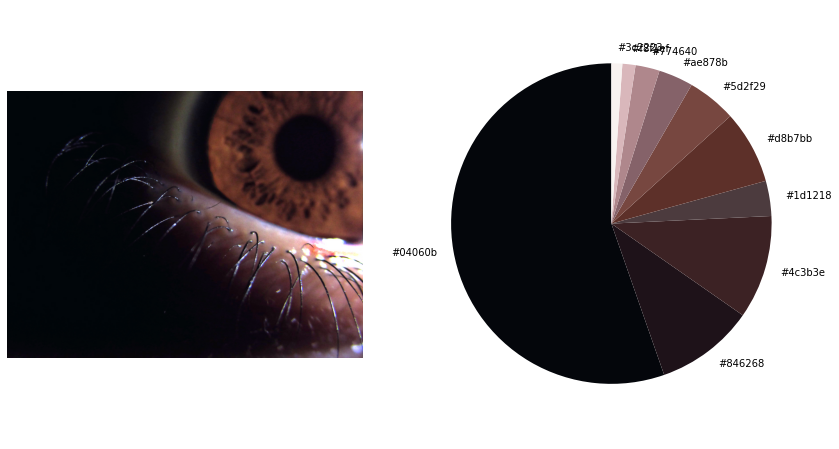

In [38]:
plot_image_info('Decent eye.JPG',10)